In [1]:
!sudo apt-get install python3-tk

Reading package lists... Done
Building dependency tree       
Reading state information... Done
python3-tk is already the newest version (3.6.9-1~18.04).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.


# Image Classification – Deep Learning Project in Python with Keras

In this project, we will build a convolution neural network in Keras with python on a CIFAR-10 dataset. First, we will explore our dataset, and then we will train our neural network using python and Keras.


About Image Classification Dataset
CIFAR-10 is a very popular computer vision dataset. This dataset is well studied in many types of deep learning research for object recognition.

This dataset consists of 60,000 images divided into 10 target classes, with each category containing 6000 images of shape 32*32. This dataset contains images of low resolution (32*32), which allows researchers to try new algorithms. The 10 different classes of this dataset are:

Airplane
Car
Bird
Cat
Deer
Dog
Frog
Horse
Ship
Truck
CIFAR-10 dataset is already available in the datasets module of Keras. We do not need to download it; we can directly import it from keras.datasets.




## Steps for image classification on CIFAR-10:

#### 1. Load the dataset from keras datasets module

In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np

 
(train_X,train_Y),(test_X,test_Y)=cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [3]:
train_X.shape


(50000, 32, 32, 3)

In [4]:
test_X.shape

(10000, 32, 32, 3)

Here we can see there are 50000 training images and 10000 testing images


In [5]:
train_Y.shape

(50000, 1)

In [6]:
train_Y[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

train_Y is a 2-D array, for our classification having 1-D array is good enough. so we will convert this to 1-D array now 

In [7]:
train_Y = train_Y.reshape(-1,)
train_Y[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [8]:
test_Y = test_Y.reshape(-1,)
test_Y

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

In [9]:
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

2. Plot some images from the dataset to visualize the dataset

In [10]:
def plot_sample(X, Y, index):
  plt.figure(figsize=(16,2))
  plt.imshow(X[index])
  plt.xlabel(classes[Y[index]])

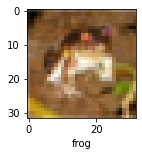

In [11]:
plot_sample(train_X, train_Y, 0)

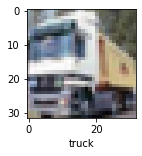

In [12]:
plot_sample(train_X, train_Y, 1)

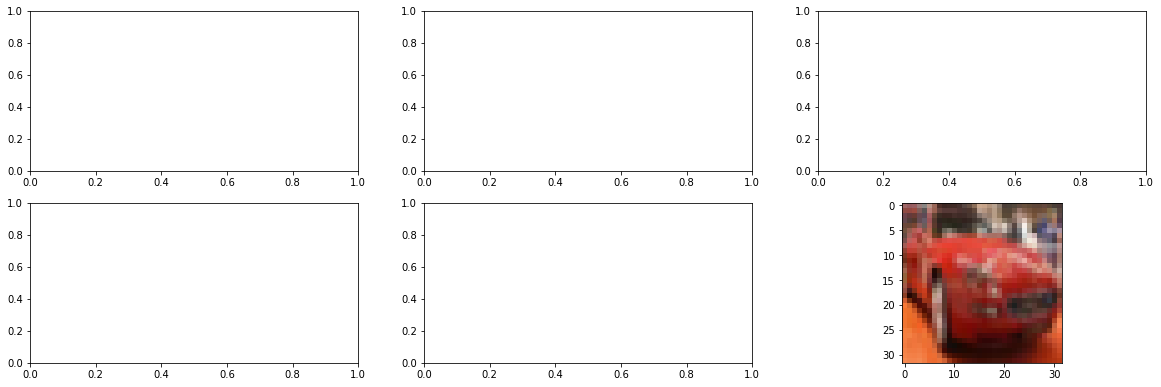

In [13]:
n=6
plt.figure(figsize=(20,10))
for i in range(n):
    plt.subplot(330+1+i)
plt.imshow(train_X[i])
plt.show()

3. Import the required layers and modules to create our convolution neural net architecture

In [14]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from tensorflow.keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils

Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range, we need to divide it by 255


4. Convert the pixel values of the dataset to float type and then normalize the dataset




In [15]:
train_x=train_X.astype('float32')
test_X=test_X.astype('float32')
 
train_X=train_X/255.0
test_X=test_X/255.0

5. Perform One hot encoding on target classes

In [16]:
train_Y=np_utils.to_categorical(train_Y)
test_Y=np_utils.to_categorical(test_Y)
 
num_classes=test_Y.shape[1]

6. Create the sequential model and add the layers

In [17]:
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=(32,32,3),
    padding='same',activation='relu',
    kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(32,(3,3),activation='relu',padding='same',kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(512,activation='relu',kernel_constraint=maxnorm(3)))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))


7. Configure the optimizer and compile the model

In [18]:
sgd=SGD(lr=0.01,momentum=0.9,decay=(0.01/25),nesterov=False)
 
model.compile(loss='categorical_crossentropy',
  optimizer=sgd,
  metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


8. View the model summary for better understanding of model architecture

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               4194816   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0

9. Train the model

In [20]:
model.fit(train_X,train_Y,validation_data=(test_X,test_Y), epochs=20,batch_size=32)

Epoch 1/20
1563/1563 [==============================] - 48s 11ms/step - loss: 1.7124 - accuracy: 0.3815 - val_loss: 1.3912 - val_accuracy: 0.4935
Epoch 2/20
1563/1563 [==============================] - 16s 10ms/step - loss: 1.3302 - accuracy: 0.5247 - val_loss: 1.1567 - val_accuracy: 0.5900
Epoch 3/20
1563/1563 [==============================] - 16s 10ms/step - loss: 1.1627 - accuracy: 0.5848 - val_loss: 1.0965 - val_accuracy: 0.6071
Epoch 4/20
1563/1563 [==============================] - 17s 11ms/step - loss: 1.0445 - accuracy: 0.6302 - val_loss: 1.0463 - val_accuracy: 0.6295
Epoch 5/20
1563/1563 [==============================] - 16s 10ms/step - loss: 0.9459 - accuracy: 0.6636 - val_loss: 0.9705 - val_accuracy: 0.6528
Epoch 6/20
1563/1563 [==============================] - 16s 10ms/step - loss: 0.8688 - accuracy: 0.6921 - val_loss: 0.9485 - val_accuracy: 0.6637
Epoch 7/20
1563/1563 [==============================] - 16s 10ms/step - loss: 0.7959 - accuracy: 0.7193 - val_loss: 0.9434 -

10. Calculate its accuracy on testing data

In [21]:
_, acc=model.evaluate(test_X,test_Y)
print(acc*100)

313/313 [==============================] - 2s 5ms/step - loss: 1.0044 - accuracy: 0.7031
70.31000256538391


11. Save the model

In [23]:
model.save("model_cifar_10epoch.h5")

12. Make predictions from the model

In [22]:
Y_pred = model.predict(test_X)
Y_pred[:5]

array([[2.16444983e-04, 1.16190691e-04, 3.64991516e-04, 7.39301443e-01,
        2.04838277e-03, 2.35966280e-01, 2.05696523e-02, 6.29409842e-05,
        1.34319882e-03, 1.05192757e-05],
       [2.07384536e-03, 1.95094254e-02, 2.23824923e-08, 2.34286368e-10,
        3.30409977e-10, 8.41492999e-13, 5.10582653e-11, 9.53813417e-12,
        9.78402853e-01, 1.38244741e-05],
       [8.57194185e-01, 3.01819830e-03, 1.29745007e-04, 7.63279386e-05,
        2.39918882e-04, 3.46375382e-05, 2.91419724e-06, 2.97395542e-04,
        1.37926325e-01, 1.08026678e-03],
       [9.01708364e-01, 3.17303860e-03, 5.19304443e-03, 5.06441400e-04,
        3.54364427e-04, 4.73736827e-06, 1.36417075e-04, 1.45325771e-06,
        8.85072947e-02, 4.14947426e-04],
       [1.31035157e-13, 6.77708432e-13, 2.29076802e-04, 1.21923583e-02,
        9.75597084e-01, 1.52920802e-05, 1.19662555e-02, 1.97697458e-09,
        3.19288973e-09, 7.30345363e-13]], dtype=float32)

In [24]:
results={
   0:'aeroplane',
   1:'automobile',
   2:'bird',
   3:'cat',
   4:'deer',
   5:'dog',
   6:'frog',
   7:'horse',
   8:'ship',
   9:'truck'
}


In [37]:
from PIL import Image
import numpy as np
from numpy import array
im=Image.open("/content/drive/MyDrive/Untitled folder/cifarimages/automobile.png")
# the input image is required to be in the shape of dataset, i.e (32,32,3)
 
im=im.resize((32,32))
im=np.expand_dims(im,axis=0)
im=np.array(im)
Y_pred=model.predict([im])[0]
print(Y_pred)



[0.000000e+00 3.335339e-23 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 1.000000e+00 0.000000e+00]
{0: 'aeroplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}
